In [34]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [7]:
def numpy_eig(a):
    w, v = np.linalg.eig(a)
    return w, v


In [8]:
def gen_matrix(n):
    return [[0 for i in range(n)] for j in range(n)]

In [9]:
def read_graph(path, g):
    file = open(path, 'r')
    for line in file:
        words = line.split()
        g[int(words[0])][int(words[1])] = 1        

In [10]:
def get_succ(g, v): # F
    succ = []
    for i in range(len(g)):
        if g[v][i] != 0:
            succ.append(i)
    return succ

In [11]:
def get_pred(g, v): # B
    pred = []
    for i in range(len(g)):
        if g[i][v] != 0:
            pred.append(i)
    return pred

In [12]:
def v_norm(g, v):
    n = len(get_succ(g, v))
    return n

In [13]:
def g_norm(g):
    n = len(g)
    for r in range(n):
        for c in range(n):
            if g[r][c] == 1:
                g[r][c] /= v_norm(g, r)

In [14]:
def r_fun(g, u, c):
    pass

In [45]:
def plot_graph(g):
    G = nx.to_networkx_graph(np.array(g), create_using=nx.DiGraph())
    plt.figure(figsize=(7, 7))
    nx.draw(G, with_labels=True)
    plt.show()

In [46]:
g = gen_matrix(4)
read_graph("in.txt", g)
g_norm(g)
print(np.array(g))
w, v = np.linalg.eig(g) # w[0] , v[:, 0]

[[ 0.   0.5  0.   0.5]
 [ 0.   0.   0.   1. ]
 [ 0.   0.   0.   1. ]
 [ 0.   0.   0.   0. ]]


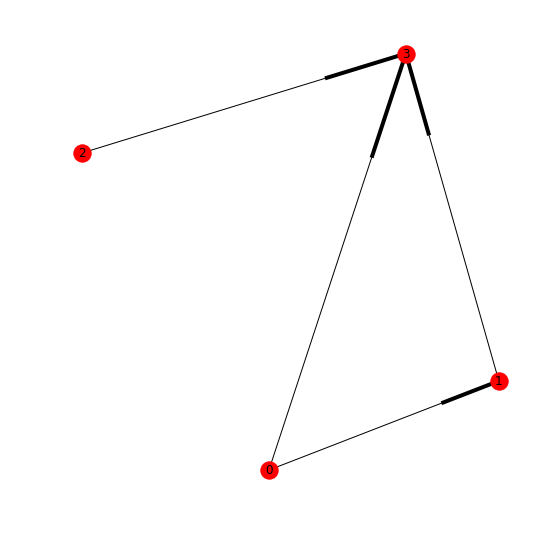

In [48]:
plot_graph(g)